In [1]:
import requests
import re
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

# Read in Data

In [2]:
movie = pd.read_csv("../Data/IMDb_Movies.csv")

In [3]:
score = pd.read_csv("../Data/IMDb_Score.csv")

In [4]:
rt = pd.read_csv("../Data/Rotten_Tomatoes.csv")

In [5]:
genre = pd.read_csv("../Data/Genre.csv")

In [6]:
dist = pd.read_csv("../Data/Distributor.csv")

### Movie and RT combined

In [7]:
m_rt = movie.merge(rt, how = 'outer', on = 'Title_ID')

### Movie and Score Combined

In [8]:
m_s = movie.merge(score, how = 'outer', on = 'Score_ID')

### Movie, Score, and RT in One DataFrame

In [9]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")

### Movie and Genre

In [10]:
m_g = movie.merge(genre, how = 'inner', on = 'Title_ID')

### Movie, Score, and RT in One DataFrame

In [11]:
m_d = movie.merge(dist, how = 'inner', on = 'Title_ID')

# Further Analysis

## Question 5: What is the average length of the movies?

In [12]:
all_df['Runtime'].mean()

128.964

#### The longest movie?

In [13]:
my_max = all_df.nlargest(1,'Runtime')
my_max

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,...,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
157,1776158,Gone with the Wind,Victor Fleming,Approved,238,1939,12,22,704158,90,...,19870000.0,8.2,316204,96524,174650,152540,77476,8.1,8.5,82


#### The shortest movie?

In [14]:
my_min = all_df.nsmallest(1,'Runtime')
my_min

,Title_ID,Title,Director,Rating,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,...,US_Box_Int,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
194,1776195,Sherlock Jr.,Buster Keaton,Approved,45,1924,0,2,704195,93,...,0.0,8.2,50588,13444,32805,31616,4935,8.2,8.2,82


## Question 6: What is the average movie rating?

In [15]:
avg_rating = pd.DataFrame(all_df['Rating'].value_counts()).reset_index()
avg_rating = avg_rating.rename(columns = {'index':'Rating','Rating':'Count'})
avg_rating['Average'] = round((avg_rating['Count']/avg_rating['Count'].sum())*100,2)

#other
avg_rating['Rating'] = avg_rating['Rating'].replace('TV-MA','Other').replace('TV-PG','Other').replace('X','Other').replace('Not Available on IMDb','Other')

#sort
avg_drop1=pd.DataFrame(avg_rating.groupby(['Rating'])['Average'].sum()).reset_index().sort_values(by='Rating')
avg_drop1

,Rating,Average
0,Approved,11.6
1,G,7.6
2,Not Rated,10.0
3,Other,1.6
4,PG,15.2
5,PG-13,13.6
6,R,40.4


Graph for AVG Rating

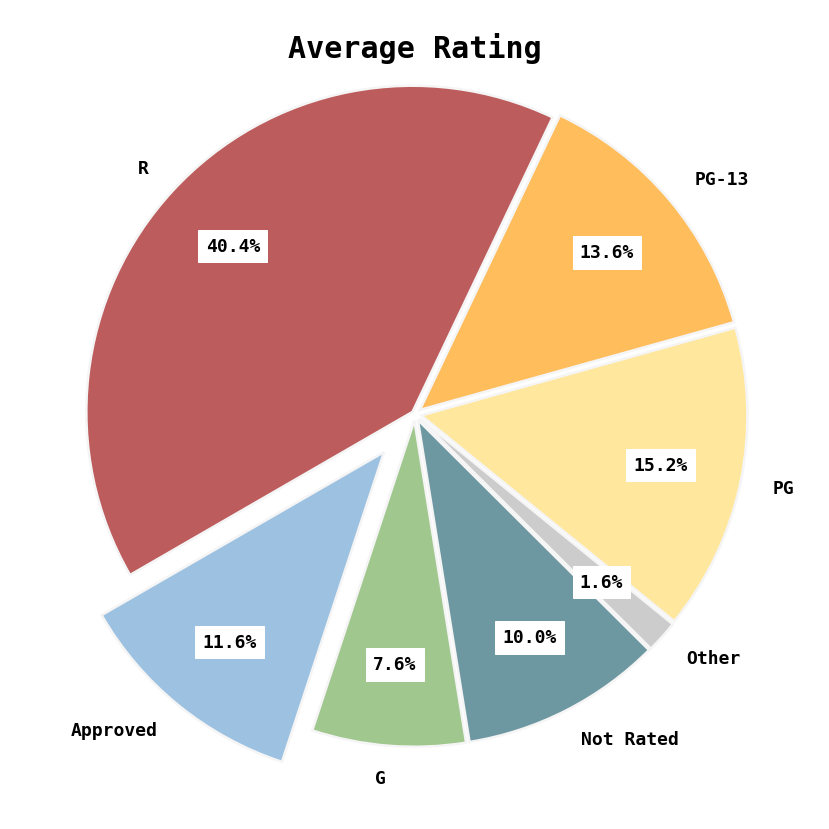

In [94]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Define plot size
plt.rcParams['figure.figsize'] = [20, 15]

explode = (.15,.02,.02,.02,.02,.02,.01)
#pie chart
avg_drop1.plot(x='Rating', y='Average', kind = 'pie', 
            colors = ['#9CC1E1','#A0C78E','#6E98A1','#CCCCCC','#FFE79D','#FFBD5C','#BD5C5C'],
            labels = ('Approved','G','Not Rated','Other','PG','PG-13','R'), legend = False,
            autopct='%1.1f%%', pctdistance = 0.75,explode = explode, startangle = 210,
            textprops = {'color':'black','weight':'bold','backgroundcolor':'white'}, fontsize = 18, 
            wedgeprops = {"edgecolor" : "whitesmoke",'linewidth':2.5,'antialiased': True})

#removing y label
plt.ylabel('')

#title
plt.title("Average Rating", weight = 'bold', size = 30, y = .93);

## Question 7: What percentage of movies were "approved" with the Hayes Coded compared to newer movies with the MPAA modern rating system?

In [17]:
rr = all_df[['Release_Year','Rating']]
rr['Rating'] = rr['Rating'].replace('TV-MA','Other').replace('TV-PG','Other').replace('X','Other').replace('Not Available on IMDb','Other')

rr['Release_Year'] = round(rr['Release_Year'],-1)
rr_group = pd.DataFrame(rr.groupby(['Release_Year','Rating'])['Rating'].count())
rr_group = rr_group.rename(columns = {'Rating':'Count'})
rr_group

C:\Users\hanna\AppData\Local\Temp\ipykernel_5136\498976204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['Rating'] = rr['Rating'].replace('TV-MA','Other').replace('TV-PG','Other').replace('X','Other').replace('Not Available on IMDb','Other')
C:\Users\hanna\AppData\Local\Temp\ipykernel_5136\498976204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['Release_Year'] = round(rr['Release_Year'],-1)


Count
Release_Year Rating          
1920         Approved       3
1930         Approved       4
             G              1
             Not Rated      1
1940         Approved       6
             G              3
             PG             2
1950         Approved       6
             G              1
             Not Rated      6
             PG             3
1960         Approved      10
             G              2
             Not Rated      7
             PG             3
             R              2
1970         G              1
             Not Rated      2
             Other          1
             PG             2
             PG-13          1
             R              5
1980         G              1
             Not Rated      1
             Other          1
             PG            12
             R             15
1990         G              3
             Not Rated      1
             PG             3
             PG-13          3
             R             15
2000         G              3
             Not Rated      4
             PG             6
             PG-13         12
             R             31
2010         G              4
             Not Rated      1
             PG             3
             PG-13         10
             R             22
2020         Not Rated      2
             Other          2
             PG             4
             PG-13          8
             R             11

In [18]:
df = rr_group.unstack(level='Rating')

# The name of columns would become the name of legend
# when using dataframe plot
df.columns.name = 'Release_Year'

df

Count                                       
Rating       Approved    G Not Rated Other    PG PG-13     R
Release_Year                                                
1920              3.0  NaN       NaN   NaN   NaN   NaN   NaN
1930              4.0  1.0       1.0   NaN   NaN   NaN   NaN
1940              6.0  3.0       NaN   NaN   2.0   NaN   NaN
1950              6.0  1.0       6.0   NaN   3.0   NaN   NaN
1960             10.0  2.0       7.0   NaN   3.0   NaN   2.0
1970              NaN  1.0       2.0   1.0   2.0   1.0   5.0
1980              NaN  1.0       1.0   1.0  12.0   NaN  15.0
1990              NaN  3.0       1.0   NaN   3.0   3.0  15.0
2000              NaN  3.0       4.0   NaN   6.0  12.0  31.0
2010              NaN  4.0       1.0   NaN   3.0  10.0  22.0
2020              NaN  NaN       2.0   2.0   4.0   8.0  11.0

C:\Users\hanna\AppData\Local\Temp\ipykernel_5136\1554515965.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_lines(), labels = labels, ncol=2, fontsize = 32, markerscale = 1.5)


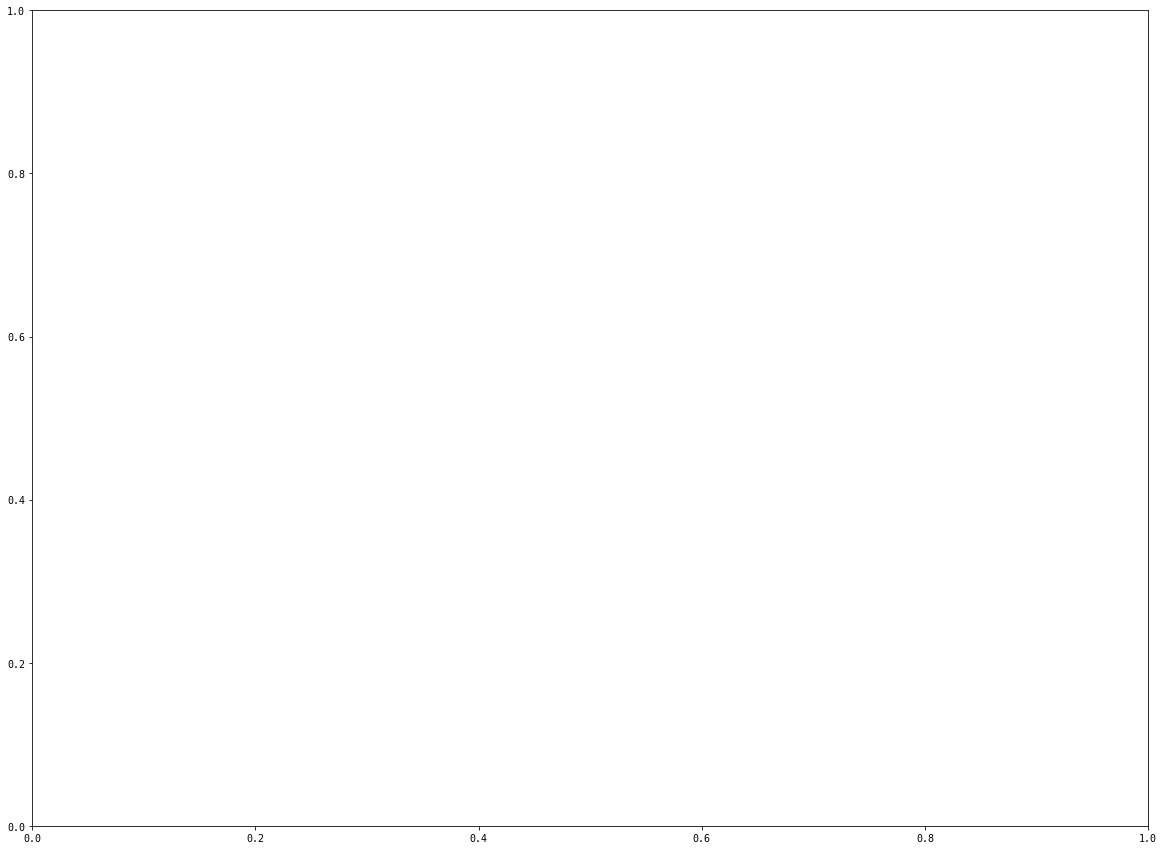

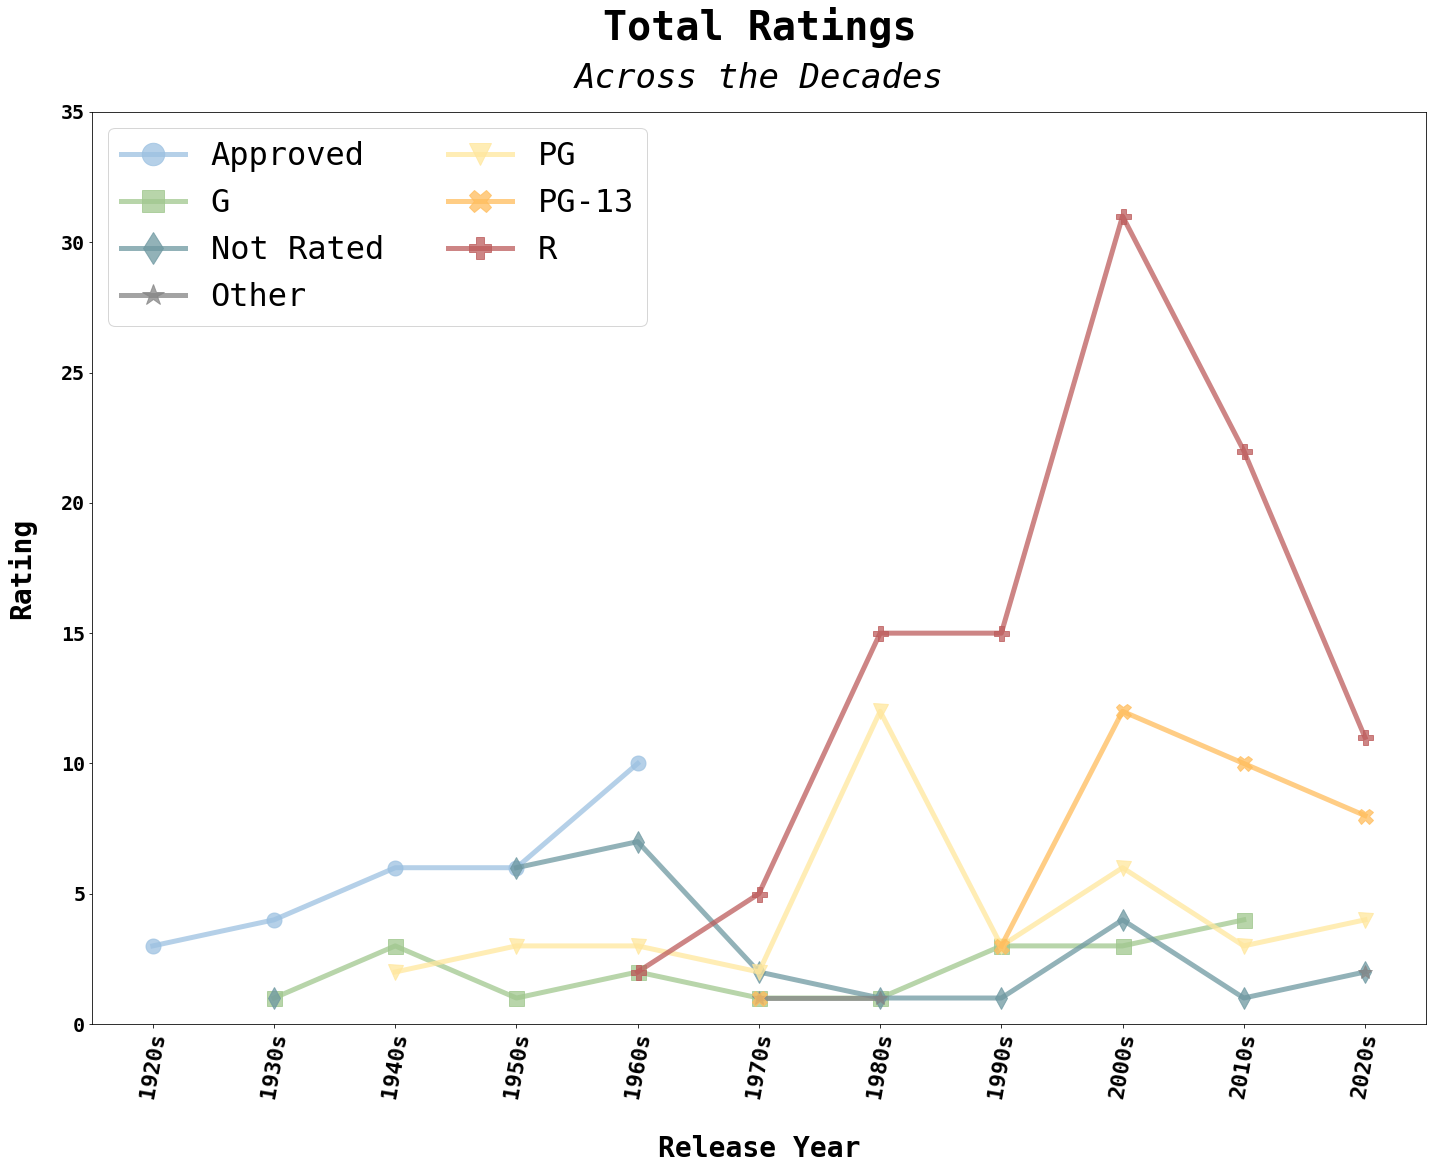

In [93]:
fig, ax = plt.subplots()
ax = df.plot(linewidth=5,markersize=15, alpha = .75,
             color =['#9CC1E1','#A0C78E','#6E98A1','#858585','#FFE79D','#FFBD5C','#BD5C5C'])

# set axis labels
ax.set_xlabel('Release Year', weight = 'bold', size = 28, labelpad = 35)
ax.set_ylabel('Rating', weight = 'bold', size = 28, labelpad = 25)

# set markers
markers = ['o', 's', 'd', '*', 'v','X','P','D']

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    
# Set the x labels
ax.set_xticks([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_xticklabels(['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s',
                   '2000s','2010s','2020s'], weight = 'bold', size = '22', rotation = 80)
# Set the y labels
ax.set_ylim(0, 35)
ax.set_yticks([0,5,10,15,20,25,30,35], weight = 'bold', size = '20')
ax.set_yticklabels(['0','5','10','15','20','25','30','35'], weight = 'bold', size = '20')

# update legend
labels = ['Approved','G','Not Rated','Other','PG','PG-13','R']
ax.legend(ax.get_lines(), labels = labels, ncol=2, fontsize = 32, markerscale = 1.5)

plt.tight_layout()

#title 
plt.suptitle('Total Ratings', weight = 'bold', size = 40, x =.53, y=1.08)

plt.title('Across the Decades', style = 'italic', size = 34, y =1.02);

## Question 8: What is the range of years of the movies in the Top 250 List?

In [ ]:
all_df['Release_Year'].max()

In [ ]:
all_df['Release_Year'].min()

#### What is the distribution of years?

In [ ]:
# Define plot size
plt.rcParams['figure.figsize'] = [20, 15]

plt.hist(all_df['Release_Year'], bins=20,
         color = '#A2BA97', edgecolor='#465E3B', linewidth=3)

# Set the x labels
plt.xticks([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], size = 18, weight = 'bold')
            
# Set the y labels
plt.ylim(0, 30)
tick_val = [2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0,22.5,25.0,27.5,30.0]
tick_lab = ['2.5','5.0','7.5','10.0','12.5','15.0','17.5','20.0','22.5','25.0','27.5','30.0']
plt.yticks(tick_val,tick_lab, size = '18')

#title 
plt.suptitle('DISTRIBUTION', weight = 'bold', size = 34, x =.51, y=.97)

plt.title('Movie Release Years through the Decades', style = 'italic', size = 30, y =1.02);

#### What decade were most films released in?

In [ ]:
round(all_df['Release_Year'],-1).value_counts()

## Question 9: Which directors appear more than once?

## Question 10: What is the average difference between critics' scores and audiences' scores on Rotten Tomotatoes?

## Question 11: How do US-reviewers compare to non-US reviewers on IMDb?

#### Who tends to write more reviews?

#### What is the average scores between the two?

#### What genre interests US-reviewers more? What about non-US reviewers?

NOTE: important to note that the term US and non-US is based on the country the reviewer left the review...does not necessarily indicate that reviewers' citizenship

## Question 12: How many movies are a part of the same cinematic "universe"?

## Question 13: Which distributor has been a part of the most movies in the Top 250 Movie List?

## RT V IMDb

In [142]:
pd.set_option('display.max_rows', None)
dire = pd.DataFrame(all_df['Director'].value_counts()).reset_index().rename(columns = {'index':'Director', 'Director':'Count'})

dire1 = round(all_df.groupby(['Director'])['RT_All_Pct','IMDb_Score_Pct'].mean().reset_index(),1)

dires = dire.merge(dire1, how = 'inner', on='Director')

dires1 = pd.DataFrame(dires.groupby(['Director','RT_All_Pct','IMDb_Score_Pct'])['Count'].sum()
                     ).reset_index().sort_values(by='Count', ascending = False)[:9]
dires1.sort_values(by='RT_All_Pct', ascending = False)

C:\Users\hanna\AppData\Local\Temp\ipykernel_5136\2888177772.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dire1 = round(all_df.groupby(['Director'])['RT_All_Pct','IMDb_Score_Pct'].mean().reset_index(),1)


,Director,RT_All_Pct,IMDb_Score_Pct,Count
8,Billy Wilder,95.5,83.2,5
2,Akira Kurosawa,94.5,83.0,7
134,Steven Spielberg,93.7,83.7,7
132,Stanley Kubrick,91.9,83.1,7
109,Quentin Tarantino,89.4,84.2,5
18,Christopher Nolan,88.2,85.6,7
88,Martin Scorsese,88.0,83.1,7
17,Charles Chaplin,86.3,83.8,5
4,Alfred Hitchcock,85.0,83.2,6


In [150]:
dires1['Diff'] = dires1['RT_All_Pct'] - dires1['IMDb_Score_Pct']
dires1.sort_values('RT_All_Pct')

,Director,RT_All_Pct,IMDb_Score_Pct,Count,Diff
4,Alfred Hitchcock,85.0,83.2,6,1.8
17,Charles Chaplin,86.3,83.8,5,2.5
88,Martin Scorsese,88.0,83.1,7,4.9
18,Christopher Nolan,88.2,85.6,7,2.6
109,Quentin Tarantino,89.4,84.2,5,5.2
132,Stanley Kubrick,91.9,83.1,7,8.8
134,Steven Spielberg,93.7,83.7,7,10.0
2,Akira Kurosawa,94.5,83.0,7,11.5
8,Billy Wilder,95.5,83.2,5,12.3


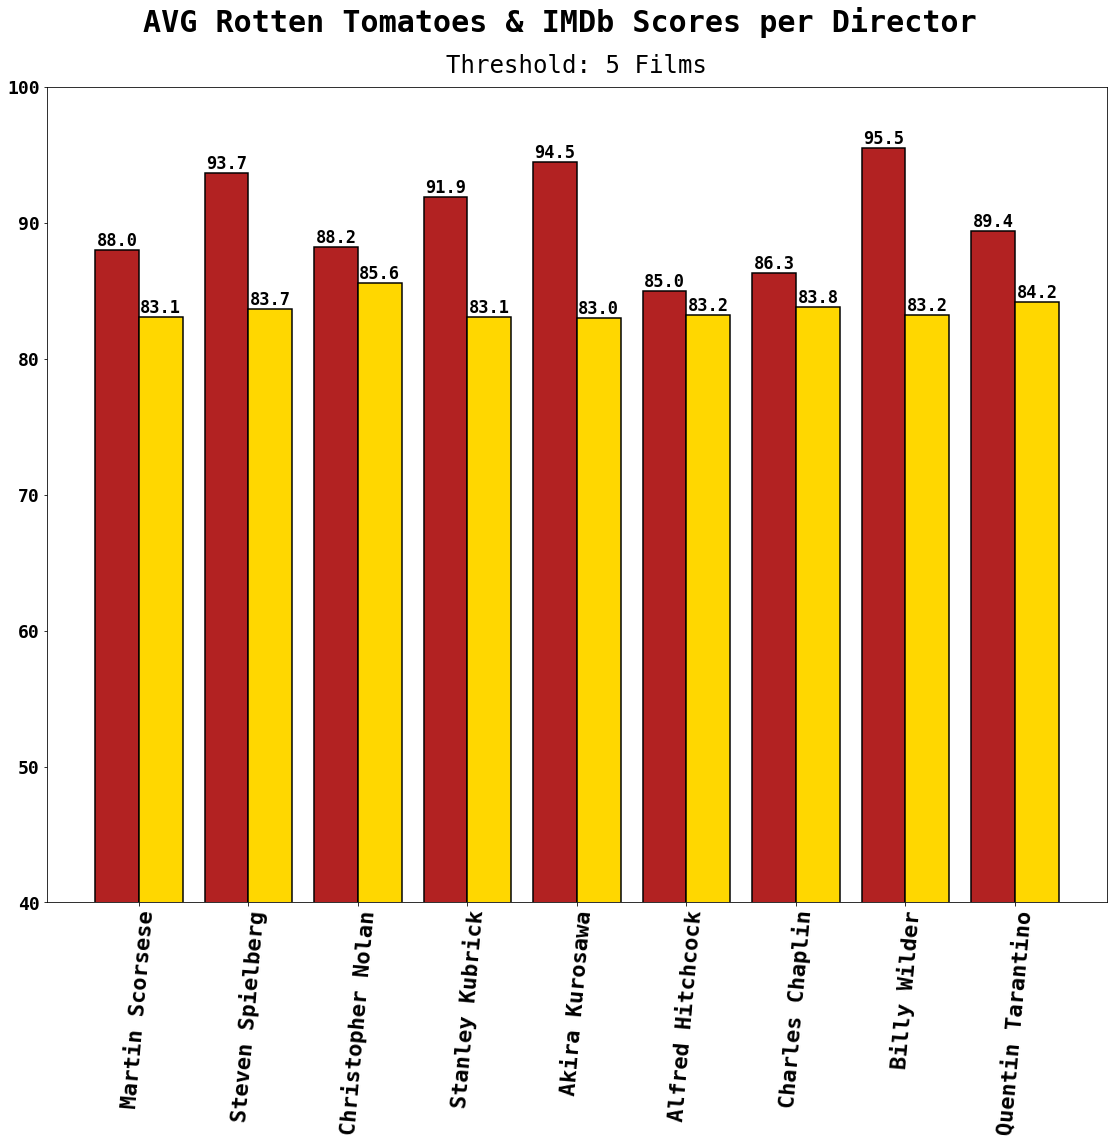

In [147]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
x = np.arange(len(dires1['Director']))
width = 0.4

# Define plot size
plt.rcParams['figure.figsize'] = [19, 15]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.bar(x-width/2, dires1['RT_All_Pct'], width, 
              color = 'firebrick', edgecolor = 'black', linewidth = 1.5)

bar2 = ax.bar(x+width/2, dires1['IMDb_Score_Pct'], width, 
              color = 'gold', edgecolor = 'black', linewidth = 1.5)
 
# label values for bars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
for bar in ax.patches:
    bar_value = bar.get_height() # The text annotation for each bar should be its height.
    text = f'{bar_value:,}'   # Format the text with commas to separate thousands. 
    text_x = bar.get_x() + bar.get_width() / 2 # This will give the middle of each bar on the x-axis.
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    # If we want the text to be the same color as the bar, we can get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, weight = 'semibold',
            ha='center', va='bottom', 
            color='black',size=17)
    
# Set the x labels and legends
ax.set_xticks(x)
ax.set_xticklabels(dires1['Director'], 
                   weight = 'semibold', size = '22', rotation = 85)
ax.legend

# Set the y labels
ax.set_ylim(40,100)
ax.set_yticks([40,50,60,70,80,90,100])
ax.set_yticklabels(['40','50','60','70','80','90','100'], weight = 'bold', size = '18')

#title 
plt.suptitle("AVG Rotten Tomatoes & IMDb Scores per Director", 
             weight = 'bold', size = 30, x =.5, y=.954)
plt.title("Threshold: 5 Films", weight = 'medium', size = 24,x =.5, y=1.01);

### Random Code for Reference

code for font colors

In [ ]:
### <font color='royalblue'> Visual (Question 2) </font>

see all columns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_df